In [6]:
#Mining the opinions of your employees is something a lot of companies overlook.

#Let’s say you have a company of 100 people who live, work and breathe your brand…have you ever asked them for their feedback?
#It’s like having a gold mine in your backyard that you’ve never bothered to dig up.

#By analyzing employee surveys and segmenting them, you can weed out key problems in your company and workforce.
#This allows your employees to be heard, which is crucial for any company.

#You will also be able to track their work satisfaction levels and flag urgent problems that need to be addressed in your company.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt


In [8]:
df = pd.read_excel('Work Book.xlsx')

In [9]:
print (df.head(7))

   S.No  Name Coding Designation Coding Department Coding  \
0   NaN          NaN                NaN               NaN   
1   1.0          1.0                  A               ARD   
2   2.0          2.0                  A                AO   
3   3.0          3.0                  A               ARD   
4   4.0          4.0                  B                SS   
5   5.0          5.0                  B                IS   
6   6.0          6.0                  B                DS   

  How long have you worked for this organization? What is your age?  \
0                                             NaN               NaN   
1                                 3 Yrs to >5 Yrs           36 - 45   
2                                      <=10 Years          46 - 55    
3                                           >1 Yr           26 - 35   
4                                           >1 Yr           26 - 35   
5                                           >1 Yr           26 - 35   
6             

In [10]:
df["Designation Coding"] = df["Designation Coding"].astype(str)

In [11]:
df["Department Coding"] = df["Department Coding"].astype(str)

In [12]:
df["How long have you worked for this organization?"] = df["How long have you worked for this organization?"].astype(str)

In [13]:
df["What is your age?"] = df["What is your age?"].astype(str)

In [14]:
df.head(15)

,S.No,Name Coding,Designation Coding,Department Coding,How long have you worked for this organization?,What is your age?,Organization Leadership & Planning,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Employee Engagement,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Over all I am very satisfied with my Organization?
0,NaN,NaN,nan,nan,nan,nan,I understand the long-term strategy of this or...,I have confidence in the leadership of this or...,The leaders of this organization care about th...,Senior leaders live the core values of the org...,...,"Overall, I'm satisfied with the retirement pla...","Most days, I look forward to going to work?",My job provides me with a sense of meaning and...,I am proud to work for this organization,I feel this organization has created an enviro...,I am willing to give extra effort to help this...,I plan to continue my career with this organiz...,I would recommend this organization’s products...,I would recommend working here to a friend,NaN
1,1.0,1.0,A,ARD,3 Yrs to >5 Yrs,36 - 45,Disagree Strongly,Somewhat Disagree,Disagree Strongly,Disagree Strongly,...,Neutral,Disagree Strongly,Agree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly
2,2.0,2.0,A,AO,<=10 Years,46 - 55,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Neutral,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly
3,3.0,3.0,A,ARD,>1 Yr,26 - 35,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Neutral,Neutral,Agree Strongly,Agree Strongly,Neutral,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly
4,4.0,4.0,B,SS,>1 Yr,26 - 35,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,...,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Neutral,Agree Strongly,Agree Strongly,Agree Strongly
5,5.0,5.0,B,IS,>1 Yr,26 - 35,Neutral,Agree Strongly,Neutral,Agree Strongly,...,Neutral,Neutral,Neutral,Neutral,Agree Somewhat,Agree Strongly,Agree Somewhat,Agree Somewhat,Agree Somewhat,Agree Somewhat
6,6.0,6.0,B,DS,<=10 Years,46 - 55,Neutral,Agree Strongly,Somewhat Disagree,Agree Strongly,...,Neutral,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Somewhat
7,7.0,7.0,B,EOO,3 Yrs to >5 Yrs,26 - 35,Agree Somewhat,Agree Strongly,Neutral,Agree Somewhat,...,Disagree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Disagree Strongly,Agree Strongly,Agree Strongly,Agree Somewhat,Somewhat Disagree,Agree Somewhat
8,8.0,8.0,A,EOO,5 Yrs to >10 Yrs,26 - 35,Agree Strongly,Agree Somewhat,Agree Strongly,Agree Somewhat,...,Neutral,Agree Somewhat,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Somewhat,Agree Strongly
9,9.0,9.0,B,ARD,>1 Yr,26 - 35,Neutral,Agree Strongly,Agree Somewhat,Agree Strongly,...,Neutral,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Somewhat,Agree Somewhat,Agree Strongly


In [15]:
df

,S.No,Name Coding,Designation Coding,Department Coding,How long have you worked for this organization?,What is your age?,Organization Leadership & Planning,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Employee Engagement,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Over all I am very satisfied with my Organization?
0,NaN,NaN,nan,nan,nan,nan,I understand the long-term strategy of this or...,I have confidence in the leadership of this or...,The leaders of this organization care about th...,Senior leaders live the core values of the org...,...,"Overall, I'm satisfied with the retirement pla...","Most days, I look forward to going to work?",My job provides me with a sense of meaning and...,I am proud to work for this organization,I feel this organization has created an enviro...,I am willing to give extra effort to help this...,I plan to continue my career with this organiz...,I would recommend this organization’s products...,I would recommend working here to a friend,NaN
1,1.0,1.0,A,ARD,3 Yrs to >5 Yrs,36 - 45,Disagree Strongly,Somewhat Disagree,Disagree Strongly,Disagree Strongly,...,Neutral,Disagree Strongly,Agree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly
2,2.0,2.0,A,AO,<=10 Years,46 - 55,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Neutral,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly
3,3.0,3.0,A,ARD,>1 Yr,26 - 35,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Neutral,Neutral,Agree Strongly,Agree Strongly,Neutral,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly
4,4.0,4.0,B,SS,>1 Yr,26 - 35,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,...,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Neutral,Agree Strongly,Agree Strongly,Agree Strongly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,133.0,133.0,B,SCM,1 Yr to > 3 Yrs,26 - 35,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Somewhat,...,Neutral,Neutral,Neutral,Neutral,Neutral,Agree Somewhat,Neutral,Agree Somewhat,Neutral,Neutral
134,134.0,134.0,A,FA,5 Yrs to >10 Yrs,46 - 55 years,Neutral,Agree,Agree,Neutral,...,Neutral,Agree,Agree,Agree,Neutral,Agree Strongly,Agree Strongly,Agree,Agree,Neutral
135,135.0,135.0,C,IS,<=10 Years,26 - 35 years,Agree,Agree,Agree,Agree,...,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral
136,136.0,136.0,B,AO,<=10 Years,46 - 55 years,Agree,Agree,Agree,Agree,...,Agree,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree


In [16]:
print(df.columns)

Index(['S.No', 'Name Coding', 'Designation Coding', 'Department Coding',
       'How long have you worked for this organization?', 'What is your age?',
       'Organization Leadership & Planning', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Organization Culture and Communication', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Your Role in the Organization', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Work Environment', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Relationship is with Supervisor', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unname

In [17]:
df.isnull().sum()

S.No                                                  1
Name Coding                                           1
Designation Coding                                    0
Department Coding                                     0
How long have you worked for this organization?       0
                                                     ..
Unnamed: 70                                           0
Unnamed: 71                                           0
Unnamed: 72                                           0
Unnamed: 73                                           0
Over all I am very satisfied with my Organization?    1
Length: 75, dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.drop(columns = ['S.No'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14404\986462376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['S.No'], inplace=True)


In [20]:
data = df[[ 'Organization Leadership & Planning' , 'Organization Culture and Communication' , 'Your Role in the Organization' , 'Employee Development' , 'Pay & Benefits' , 'Employee Engagement' , 'Over all I am very satisfied with my Organization?']]

In [21]:
mycode = {'Neutral' : 0, 'Disagree Strongly': 1, 'Somewhat Disagree' : 2, 'Agree' : 3, 'Agree Somewhat' : 4, 'Agree Strongly':5 }

In [22]:
df

,Name Coding,Designation Coding,Department Coding,How long have you worked for this organization?,What is your age?,Organization Leadership & Planning,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 65,Employee Engagement,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Over all I am very satisfied with my Organization?
1,1.0,A,ARD,3 Yrs to >5 Yrs,36 - 45,Disagree Strongly,Somewhat Disagree,Disagree Strongly,Disagree Strongly,Disagree Strongly,...,Neutral,Disagree Strongly,Agree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly,Disagree Strongly
2,2.0,A,AO,<=10 Years,46 - 55,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Neutral,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly
3,3.0,A,ARD,>1 Yr,26 - 35,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Neutral,Neutral,Agree Strongly,Agree Strongly,Neutral,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly
4,4.0,B,SS,>1 Yr,26 - 35,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,...,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Neutral,Agree Strongly,Agree Strongly,Agree Strongly
5,5.0,B,IS,>1 Yr,26 - 35,Neutral,Agree Strongly,Neutral,Agree Strongly,Somewhat Disagree,...,Neutral,Neutral,Neutral,Neutral,Agree Somewhat,Agree Strongly,Agree Somewhat,Agree Somewhat,Agree Somewhat,Agree Somewhat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,133.0,B,SCM,1 Yr to > 3 Yrs,26 - 35,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Somewhat,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Agree Somewhat,Neutral,Agree Somewhat,Neutral,Neutral
134,134.0,A,FA,5 Yrs to >10 Yrs,46 - 55 years,Neutral,Agree,Agree,Neutral,Neutral,...,Neutral,Agree,Agree,Agree,Neutral,Agree Strongly,Agree Strongly,Agree,Agree,Neutral
135,135.0,C,IS,<=10 Years,26 - 35 years,Agree,Agree,Agree,Agree,Neutral,...,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neutral
136,136.0,B,AO,<=10 Years,46 - 55 years,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree Strongly,Agree


In [23]:
#review_df = review_df[review_df['columns'] != 'neutral']

#print(review_df.shape)
#review_df.head(5)

In [24]:
for i in data.columns:
    data[i] = data[i].replace(mycode)
    
    data.head()    

C:\Users\Dell\AppData\Local\Temp\ipykernel_14404\2819228802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].replace(mycode)


In [25]:
frequencies = {}
for i in data.columns:
    frequencies[i] = data[i].value_counts()

In [26]:
plotdata = pd.DataFrame(frequencies)
plotdata

,Organization Leadership & Planning,Organization Culture and Communication,Your Role in the Organization,Employee Development,Pay & Benefits,Employee Engagement,Over all I am very satisfied with my Organization?
0,24.0,36.0,21.0,32.0,37.0,22.0,2.0
1,3.0,5.0,2.0,8.0,32.0,1.0,NaN
2,4.0,17.0,8.0,14.0,26.0,3.0,8.0
3,3.0,1.0,2.0,2.0,1.0,3.0,2.0
4,47.0,43.0,32.0,41.0,25.0,36.0,NaN
5,56.0,35.0,72.0,40.0,16.0,72.0,NaN
Agree Somewhat,NaN,NaN,NaN,NaN,NaN,NaN,42.0
Agree Strongly,NaN,NaN,NaN,NaN,NaN,NaN,52.0
Disagree Strongly,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Neutral,NaN,NaN,NaN,NaN,NaN,NaN,28.0


<AxesSubplot:>

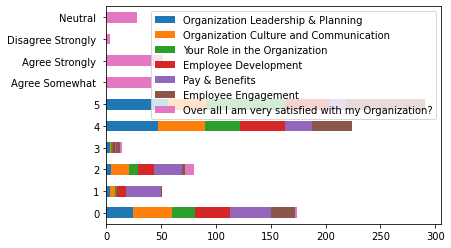

In [27]:
plotdata.plot(kind = 'barh' , stacked=True)

In [28]:
plotdata

,Organization Leadership & Planning,Organization Culture and Communication,Your Role in the Organization,Employee Development,Pay & Benefits,Employee Engagement,Over all I am very satisfied with my Organization?
0,24.0,36.0,21.0,32.0,37.0,22.0,2.0
1,3.0,5.0,2.0,8.0,32.0,1.0,NaN
2,4.0,17.0,8.0,14.0,26.0,3.0,8.0
3,3.0,1.0,2.0,2.0,1.0,3.0,2.0
4,47.0,43.0,32.0,41.0,25.0,36.0,NaN
5,56.0,35.0,72.0,40.0,16.0,72.0,NaN
Agree Somewhat,NaN,NaN,NaN,NaN,NaN,NaN,42.0
Agree Strongly,NaN,NaN,NaN,NaN,NaN,NaN,52.0
Disagree Strongly,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Neutral,NaN,NaN,NaN,NaN,NaN,NaN,28.0


<AxesSubplot:>

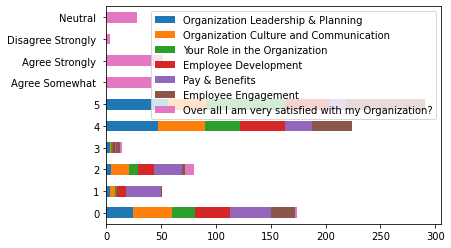

In [29]:
plotdata.plot(kind = 'barh' , stacked = True)

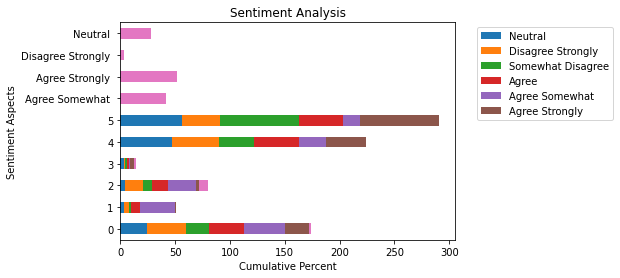

In [30]:
plotdata.plot(kind='barh' , stacked = True)
plt.legend(mycode, bbox_to_anchor = (1.05, 1))
plt.title('Sentiment Analysis')
plt.ylabel('Sentiment Aspects')
plt.xlabel('Cumulative Percent')
plt.show()

In [31]:
plotdata2 = plotdata.div(plotdata.sum(axis=1), axis=0)*100
plotdata2

,Organization Leadership & Planning,Organization Culture and Communication,Your Role in the Organization,Employee Development,Pay & Benefits,Employee Engagement,Over all I am very satisfied with my Organization?
0,13.793103,20.689655,12.068966,18.390805,21.264368,12.643678,1.149425
1,5.882353,9.803922,3.921569,15.686275,62.745098,1.960784,NaN
2,5.000000,21.250000,10.000000,17.500000,32.500000,3.750000,10.000000
3,21.428571,7.142857,14.285714,14.285714,7.142857,21.428571,14.285714
4,20.982143,19.196429,14.285714,18.303571,11.160714,16.071429,NaN
5,19.243986,12.027491,24.742268,13.745704,5.498282,24.742268,NaN
Agree Somewhat,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
Agree Strongly,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
Disagree Strongly,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
Neutral,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


<AxesSubplot:>

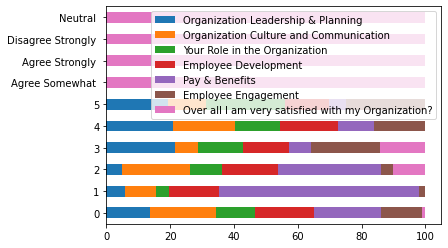

In [32]:
plotdata2.plot(kind = 'barh' , stacked = True)

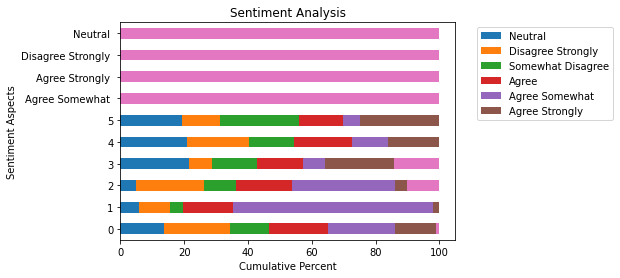

In [33]:
plotdata2.plot(kind='barh' , stacked = True)
plt.legend(mycode, bbox_to_anchor = (1.05, 1))
plt.title('Sentiment Analysis')
plt.ylabel('Sentiment Aspects')
plt.xlabel('Cumulative Percent')
plt.show()

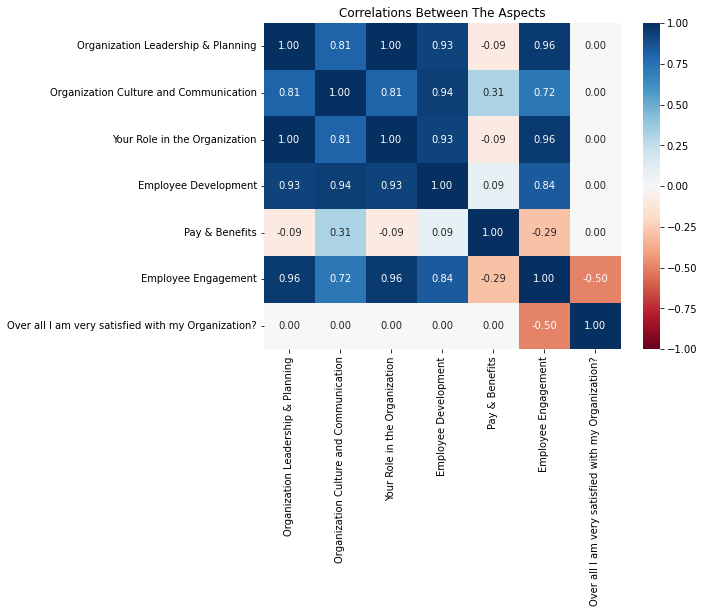

In [34]:
# Use Spearman instead of default Pearson, since these 
# are ordinal variables!
corr_matrix = plotdata.corr(method='spearman')

# Setup
fig, ax = plt.subplots(figsize=(8, 6))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between The Aspects")
#plt.savefig('sdbp_photos/corrs.png')
plt.show()

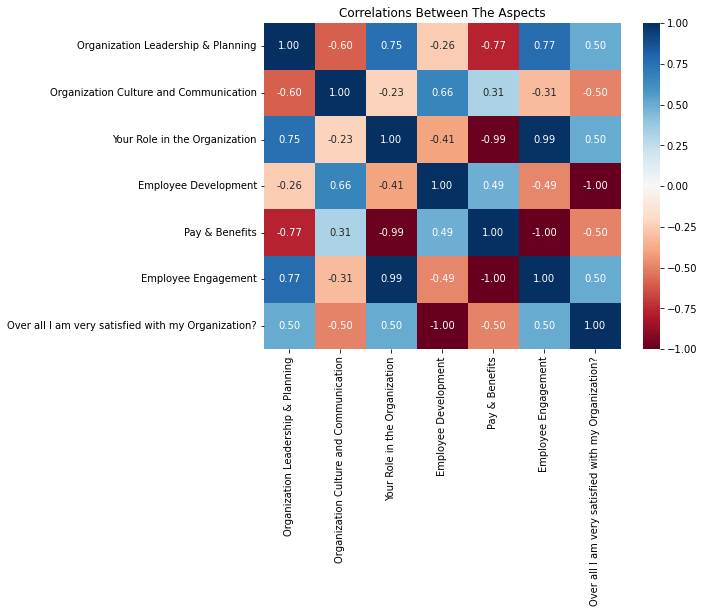

In [35]:
# Use Spearman instead of default Pearson, since these 
# are ordinal variables!
corr_matrix = plotdata2.corr(method='spearman')

# Setup
fig, ax = plt.subplots(figsize=(8, 6))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between The Aspects")
#plt.savefig('sdbp_photos/corrs.png')
plt.show()

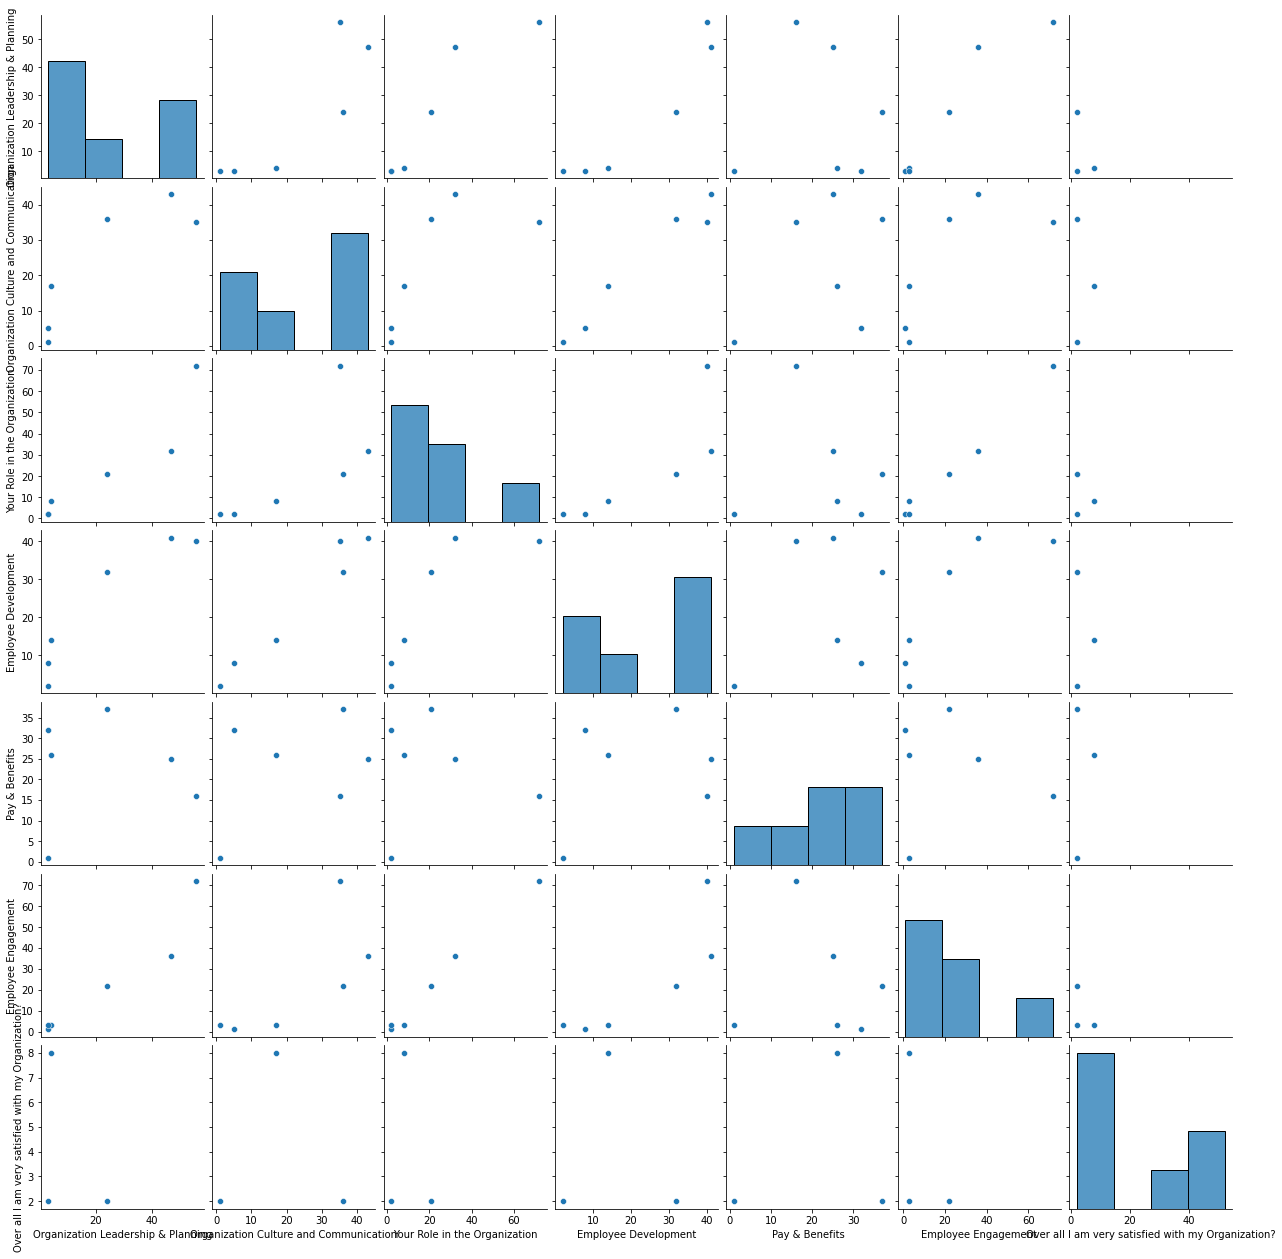

In [36]:
sns.pairplot(plotdata)

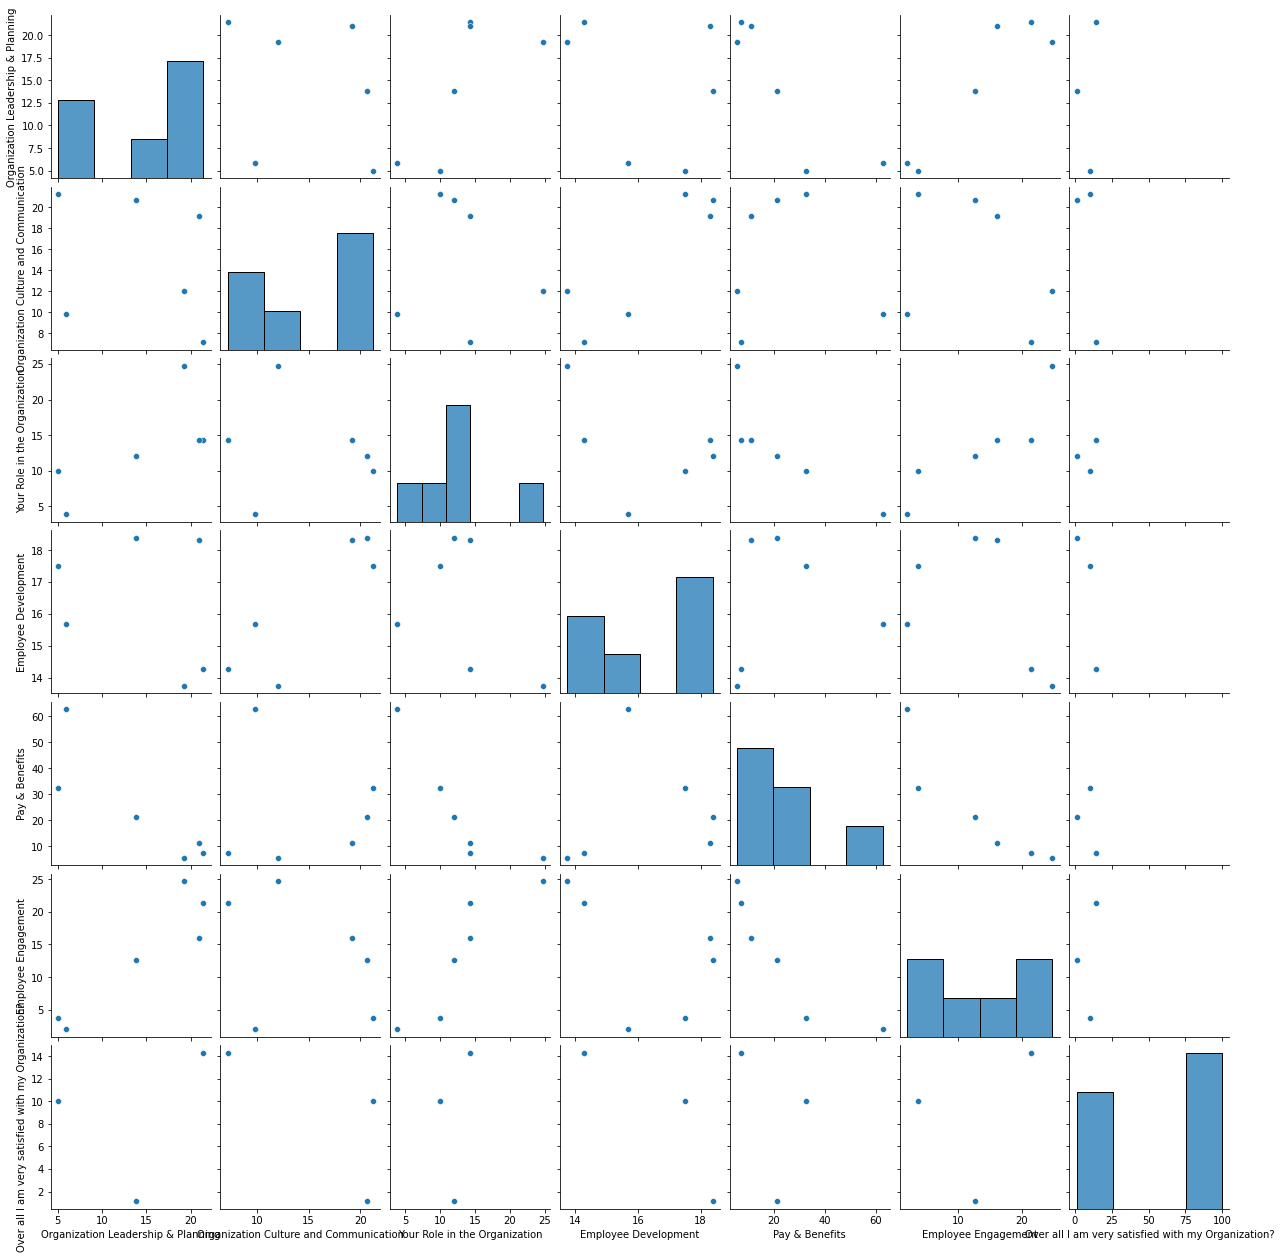

In [37]:
sns.pairplot(plotdata2)